In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/gene_expression.csv')

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

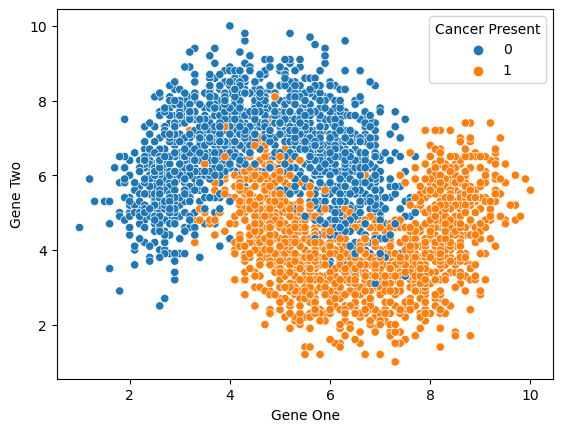

In [3]:
sns.scatterplot(data = data, x = 'Gene One', y = 'Gene Two', hue = 'Cancer Present')

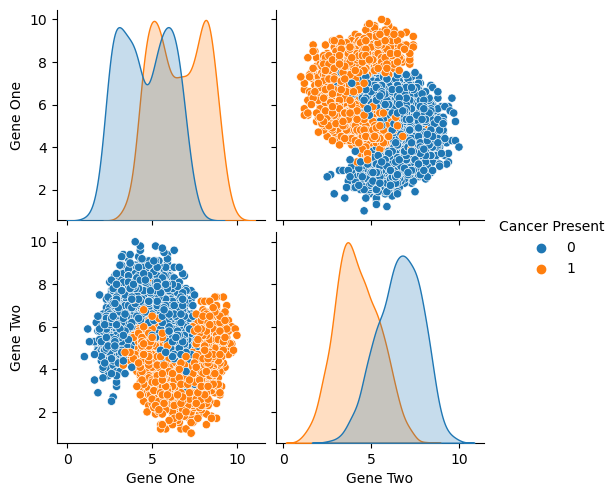

In [4]:
sns.pairplot(data = data, hue = 'Cancer Present')

(4.0, 8.0)

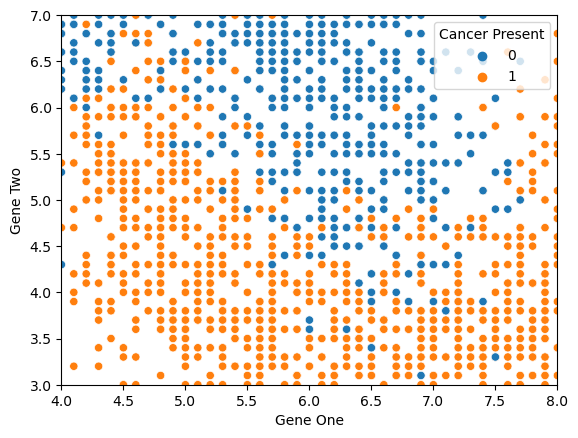

In [5]:
sns.scatterplot(data = data, x = 'Gene One', y = 'Gene Two', hue = 'Cancer Present')
plt.ylim(3,7)
plt.xlim(4,8)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [7]:
X = data.drop('Cancer Present', axis = 1)
y = data['Cancer Present']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
sc = StandardScaler()
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [10]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [12]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
preds = knn_clf.predict(X_test)

In [14]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, classification_report,f1_score, fbeta_score, recall_score, precision_score, roc_curve, auc, precision_recall_curve

In [15]:
f1_sc = f1_score(y_test,preds)
f1_sc

clf_report = classification_report(y_test,preds)
print(clf_report)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       163
           1       0.95      0.88      0.91       137

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [16]:
clf_pipe = Pipeline([('scaling',StandardScaler()),('classification',knn_clf)])
clf_pipe.get_params()

{'memory': None,
 'steps': [('scaling', StandardScaler()),
  ('classification', KNeighborsClassifier())],
 'verbose': False,
 'scaling': StandardScaler(),
 'classification': KNeighborsClassifier(),
 'scaling__copy': True,
 'scaling__with_mean': True,
 'scaling__with_std': True,
 'classification__algorithm': 'auto',
 'classification__leaf_size': 30,
 'classification__metric': 'minkowski',
 'classification__metric_params': None,
 'classification__n_jobs': None,
 'classification__n_neighbors': 5,
 'classification__p': 2,
 'classification__weights': 'uniform'}

In [17]:
params_grid = {'classification__n_neighbors':np.arange(1,25,1),}
random_grid = RandomizedSearchCV(clf_pipe, param_distributions = params_grid, n_iter = 24, cv = 5, scoring = 'accuracy', refit = 'accuracy')
random_grid.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                             ('classification',
                                              KNeighborsClassifier())]),
                   n_iter=24,
                   param_distributions={'classification__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
                   refit='accuracy', scoring='accuracy')

In [18]:
random_grid.best_params_

{'classification__n_neighbors': 24}

In [19]:
knn_clf_tunned = KNeighborsClassifier(20)
knn_clf_tunned.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [20]:
preds1 = knn_clf_tunned.predict(X_test)
clf_report = classification_report(y_test,preds1)
print(clf_report)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       163
           1       0.95      0.91      0.93       137

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

